In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
normalized_data = pd.read_csv('/kaggle/input/all-datasets/normalized_data_without_Class_Imbalancing.csv')

# Splitting the data into features (X) and target (y)
X = normalized_data.drop(columns=['Diagnosis'])
y = normalized_data['Diagnosis']

# Splitting the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy: 0.9843989769820972
F1 Score (Weighted): 0.9801694806087933
Precision (Weighted): 0.9784517946821313
Recall (Weighted): 0.9843989769820972
Cross-validation Accuracy (5-fold): 0.9849793318913722

Confusion Matrix:
[[ 172    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    1    0    0    0    0    0    0    8]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0  138    1    0    0    0   18]
 [   0    0    0    0    0    0    0    0    3    0    0    0    1]
 [   2    0    0    0    0    0    0    0    1    3    0    0    2]
 [   0    0    0    0    0    0    0    1    0    0    0    0   13]
 [   1    0    0    0    0    

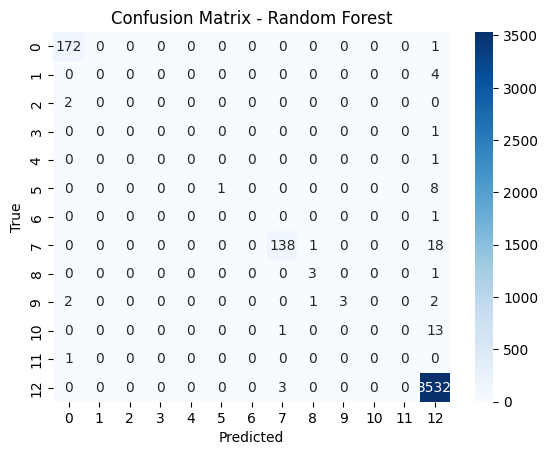

In [2]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Cross-validation score
cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("F1 Score (Weighted):", f1)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("Cross-validation Accuracy (5-fold):", cv_score.mean())
print("\nConfusion Matrix:")
print(conf_matrix)

# Optionally, plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   2.0s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END bootstrap=True, max_depth=None, min_sa

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best Model Performance:
Accuracy: 0.9864450127877238
F1 Score (Weighted): 0.9831970088688384
Precision (Weighted): 0.9840463917693374
Recall (Weighted): 0.9864450127877238
Cross-validation Accuracy (5-fold): 0.98640459024273

Confusion Matrix:
[[ 173    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    4    0    0    0    0    0    0    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0  143    1    0    0    0   13]
 [   0    0    0    0    0    0    0    0    3    0    0    0    1]
 [   1    0    0    0    0    0    0    0    1    3    0    0    3]
 [   0    0    0    0    0    0    0    0    0    0    1    0   13]
 [   1 

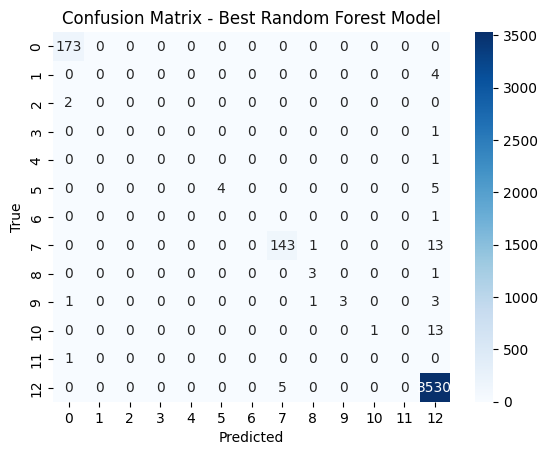

In [3]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

# Reevaluate the best model on the test set
y_pred_best = best_rf_model.predict(X_test)

# Evaluate the best model's performance
accuracy_best = accuracy_score(y_test, y_pred_best)
f1_best = f1_score(y_test, y_pred_best, average='weighted')
precision_best = precision_score(y_test, y_pred_best, average='weighted')
recall_best = recall_score(y_test, y_pred_best, average='weighted')

# Cross-validation score
cv_score_best = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

# Display results
print("\nBest Model Performance:")
print("Accuracy:", accuracy_best)
print("F1 Score (Weighted):", f1_best)
print("Precision (Weighted):", precision_best)
print("Recall (Weighted):", recall_best)
print("Cross-validation Accuracy (5-fold):", cv_score_best.mean())
print("\nConfusion Matrix:")
print(conf_matrix_best)

# Optionally, plot the confusion matrix for the best model
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Random Forest Model')
plt.show()

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Accuracy (Gradient Boosting): 0.9854219948849104
F1 Score (Weighted): 0.9841411335624792
Precision (Weighted): 0.9847314764782865
Recall (Weighted): 0.9854219948849104
Cross-validation Accuracy (5-fold): 0.9848699230954097

Confusion Matrix (Gradient Boosting):
[[ 171    2    0    0    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0    3]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    6    0    0    0    0    0    0    3]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    3    0    0    0    0    0  152    0    0    0    0    2]
 [   0    1    0    0    0    0    0    0    1    0    0    0    2]
 [   1    1    0    0    0    0    0    3    0    1    0    0    2]
 [   0    0    0    0    0    0    0    1    0    0    3  

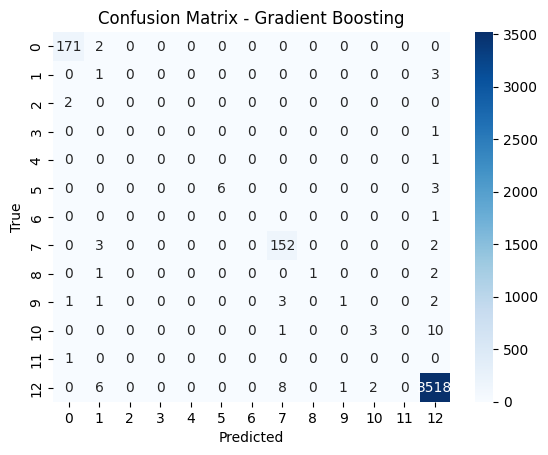

In [6]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model performance
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')

# Cross-validation score
cv_score_gbc = cross_val_score(gbc_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

# Display results
print("Accuracy (Gradient Boosting):", accuracy_gbc)
print("F1 Score (Weighted):", f1_gbc)
print("Precision (Weighted):", precision_gbc)
print("Recall (Weighted):", recall_gbc)
print("Cross-validation Accuracy (5-fold):", cv_score_gbc.mean())
print("\nConfusion Matrix (Gradient Boosting):")
print(conf_matrix_gbc)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=300, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, max_features=sqrt, min_samples_

/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
3645 fits failed out of a total of 10935.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1516 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/site-packages/sklearn/base.py", line 1329, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/site-packages/sklearn/base.py", line 492, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/site-packages/sklearn/

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.8}


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9838874680306905
F1 Score (Weighted): 0.9809943306348079
Precision (Weighted): 0.978559234850954
Recall (Weighted): 0.9838874680306905
Cross-validation Accuracy (5-fold): 0.9869528959384762

Confusion Matrix (Best GBC):
[[ 172    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    1    0    0    0    0    0    0    0    0    0    0    3]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    5    0    0    0    0    0    0    4]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    1    0    0    0    0    0  144    1    0    0    1   10]
 [   0    0    0    0    0    0    0    1    2    0    0    0    1]
 [   2    0    0    0    0    0    0    0    1    0    0    0    5]
 [   0    0    0    0    0    0    

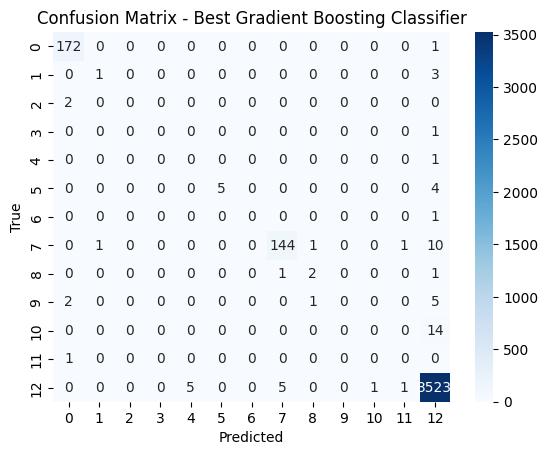


[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=0.8; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=100, subsample=0.9; total time=   4.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=   4.4s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=0.9; total time=   9.3s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=  11.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=300, subsample=0.9; total time=  12.6s
[CV] END learning_rate=0.1, max_depth=5, max_features=sqrt, min_samples_leaf=1, 

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for Gradient Boosting Classifier
param_grid = {
    'n_estimators': [100, 200, 300],            # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1],         # Learning rate
    'max_depth': [3, 5, 7],                      # Depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],               # Minimum samples required at leaf nodes
    'subsample': [0.8, 0.9, 1.0],                # Fraction of samples used for fitting each base learner
    'max_features': ['auto', 'sqrt', 'log2']    # Number of features to consider for each split
}

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Perform GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gbc_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model from GridSearchCV
best_gbc_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best_gbc = best_gbc_model.predict(X_test)

# Evaluate the model performance
accuracy_best_gbc = accuracy_score(y_test, y_pred_best_gbc)
f1_best_gbc = f1_score(y_test, y_pred_best_gbc, average='weighted')
precision_best_gbc = precision_score(y_test, y_pred_best_gbc, average='weighted')
recall_best_gbc = recall_score(y_test, y_pred_best_gbc, average='weighted')

# Cross-validation accuracy
cv_score_best_gbc = cross_val_score(best_gbc_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix for the best model
conf_matrix_best_gbc = confusion_matrix(y_test, y_pred_best_gbc)

# Displaying results
print("\nBest Model Performance after Hyperparameter Tuning:")
print("Accuracy:", accuracy_best_gbc)
print("F1 Score (Weighted):", f1_best_gbc)
print("Precision (Weighted):", precision_best_gbc)
print("Recall (Weighted):", recall_best_gbc)
print("Cross-validation Accuracy (5-fold):", cv_score_best_gbc.mean())

# Confusion Matrix for the best model
print("\nConfusion Matrix (Best GBC):")
print(conf_matrix_best_gbc)

# Visualizing the confusion matrix
sns.heatmap(conf_matrix_best_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Gradient Boosting Classifier')
plt.show()


[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=1.0; total time=  20.8s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=300, subsample=0.9; total time=  25.3s

[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  12.8s
[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200, subsample=1.0; total time=  21.2s
[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300, subsample=1.0; total time=  32.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=  11.7s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_lea

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300, subsample=0.9; total time=  28.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300, subsample=0.9; total time=  29.3s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  11.7s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  12.5s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=10, n_estimators=300, subsample=1.0; total time=  32.2s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=200, subsample=0.8; total time=  15.5s
[CV] END learning_rate=0.1, max_depth=7, max_features=log2, min_samples_leaf=4

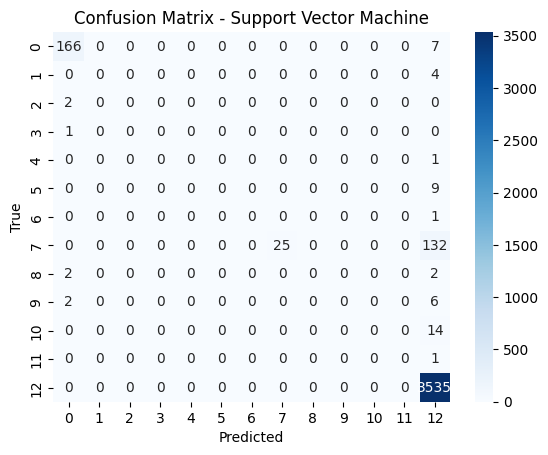


[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=1.0; total time=  14.3s
[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200, subsample=1.0; total time=  23.1s
[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=2, min_samples_split=2, n_estimators=300, subsample=1.0; total time=  31.3s
[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100, subsample=1.0; total time=  11.9s
[CV] END learning_rate=0.05, max_depth=7, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200, subsample=0.9; total time=  19.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200, subsample=0.8; total time=   7.6s
[CV] END learning_rate=0.1, max_depth=3, max_features=sqrt, min_samples_le

In [10]:
# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Cross-validation score (5-fold cross-validation)
cv_score_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Step 5: Display Results
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm:}")
print(f"F1 Score (Weighted): {f1_svm:}")
print(f"Precision (Weighted): {precision_svm:}")
print(f"Recall (Weighted): {recall_svm:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_svm.mean():}")

# Step 6: Display Confusion Matrix
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best SVM Model Parameters: {'C': 100, 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf'}

Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9621483375959079
F1 Score (Weighted): 0.9555845358509081
Precision (Weighted): 0.9540669790522311
Recall (Weighted): 0.9621483375959079
Cross-validation Accuracy (5-fold): 0.9591051429944724

Confusion Matrix (Best SVM after Hyperparameter Tuning):
[[ 169    0    1    0    0    0    0    1    0    0    0    0    2]
 [   0    2    0    0    0    0    0    0    0    0    0    0    2]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    1    0    0    0    0    0    0    8]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0   71    1    0    2    0   83]
 [   0    0    0    0    0    0    0    0    2    1    0

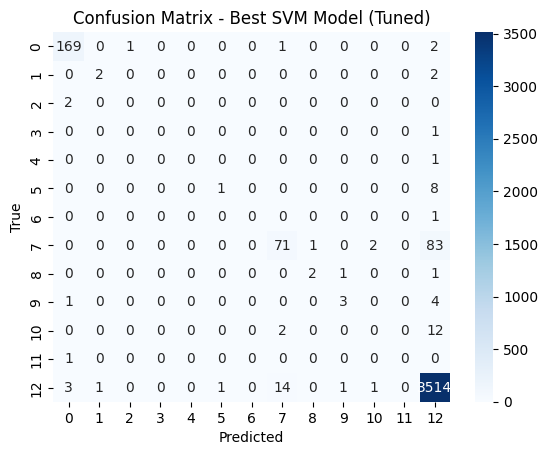

In [12]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'], # Types of kernel
    'gamma': ['scale', 'auto'],          # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'degree': [3, 4, 5],                 # Degree of the polynomial kernel (used if kernel='poly')
}

# Step 2: Initialize GridSearchCV for hyperparameter tuning
grid_search_svm = GridSearchCV(estimator=SVC(random_state=42), param_grid=param_grid_svm, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Step 3: Fit the grid search model to the training data
grid_search_svm.fit(X_train, y_train)

# Step 4: Get the best parameters found by GridSearchCV
best_params_svm = grid_search_svm.best_params_

# Step 5: Get the best model from the grid search
best_svm_model = grid_search_svm.best_estimator_

# Step 6: Make predictions with the best model
y_pred_best_svm = best_svm_model.predict(X_test)

# Step 7: Evaluate the best model performance
accuracy_best_svm = accuracy_score(y_test, y_pred_best_svm)
f1_best_svm = f1_score(y_test, y_pred_best_svm, average='weighted')
precision_best_svm = precision_score(y_test, y_pred_best_svm, average='weighted')
recall_best_svm = recall_score(y_test, y_pred_best_svm, average='weighted')

# Step 8: Cross-validation score of the best model
cv_score_best_svm = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 9: Confusion Matrix for the best model
conf_matrix_best_svm = confusion_matrix(y_test, y_pred_best_svm)

# Step 10: Display Results
print("Best SVM Model Parameters:", best_params_svm)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_svm:}")
print(f"F1 Score (Weighted): {f1_best_svm:}")
print(f"Precision (Weighted): {precision_best_svm:}")
print(f"Recall (Weighted): {recall_best_svm:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_best_svm.mean():}")

# Step 11: Confusion Matrix for the best model
print("\nConfusion Matrix (Best SVM after Hyperparameter Tuning):")
print(conf_matrix_best_svm)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_best_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best SVM Model (Tuned)')
plt.show()

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


KNN Model Performance:
Accuracy: 0.9483375959079284
F1 Score (Weighted): 0.9372936498585063
Precision (Weighted): 0.9356958121390343
Recall (Weighted): 0.9483375959079284
Cross-validation Accuracy (5-fold): 0.9461684691180003

Confusion Matrix (KNN):
[[ 142    0    0    0    0    0    0    0    0    0    0    0   31]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   2    0    0    0    0    0    0   50    0    0    1    0  104]
 [   1    0    0    0    0    0    0    0    2    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    1    0    0    7]
 [   0    0    0    0    0    0    0    2    0    0    0    0   12]
 

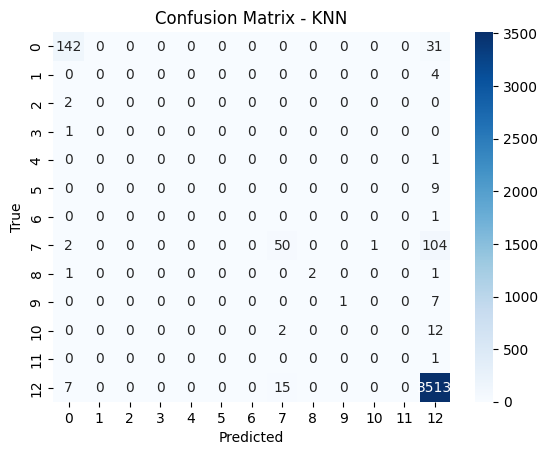

In [15]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Step 2: Train the model on the training set
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Step 7: Display results
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_knn:}")
print(f"F1 Score (Weighted): {f1_knn:}")
print(f"Precision (Weighted): {precision_knn:}")
print(f"Recall (Weighted): {recall_knn:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_knn.mean():}")

# Step 8: Confusion Matrix for the KNN model
print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()

Fitting 5 folds for each of 64 candidates, totalling 320 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best KNN Model Parameters: {'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9539641943734015
F1 Score (Weighted): 0.9431056404473278
Precision (Weighted): 0.9437058409923706
Recall (Weighted): 0.9539641943734015
Cross-validation Accuracy (5-fold): 0.9524179884643115

Confusion Matrix (Best KNN):
[[ 148    0    0    0    0    0    0    0    0    0    0    0   25]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0   54    0    0    1    0  101]
 [   1    0    0    0    0    0    0    0    1    0    0 

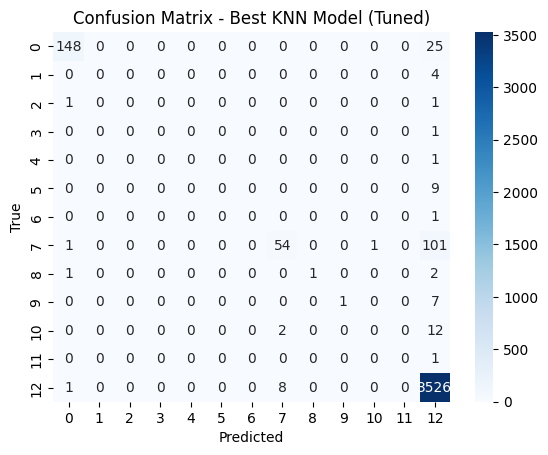

In [16]:
# Step 1: Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],              # Number of neighbors
    'weights': ['uniform', 'distance'],       # Weight function used in prediction
    'metric': ['euclidean', 'manhattan'],    # Distance metric
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm to compute the nearest neighbors
}

# Step 2: Perform GridSearchCV for hyperparameter tuning
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=param_grid_knn, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_knn.fit(X_train, y_train)

# Step 3: Get the best parameters from GridSearchCV
best_params_knn = grid_search_knn.best_params_

# Step 4: Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Step 5: Make predictions with the best model
y_pred_best_knn = best_knn_model.predict(X_test)

# Step 6: Evaluate the best model's performance
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
f1_best_knn = f1_score(y_test, y_pred_best_knn, average='weighted')
precision_best_knn = precision_score(y_test, y_pred_best_knn, average='weighted')
recall_best_knn = recall_score(y_test, y_pred_best_knn, average='weighted')

# Step 7: Cross-validation score for the best model
cv_score_best_knn = cross_val_score(best_knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 8: Confusion Matrix for the best model
conf_matrix_best_knn = confusion_matrix(y_test, y_pred_best_knn)

# Step 9: Display Results
print("Best KNN Model Parameters:", best_params_knn)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_knn:}")
print(f"F1 Score (Weighted): {f1_best_knn:}")
print(f"Precision (Weighted): {precision_best_knn:}")
print(f"Recall (Weighted): {recall_best_knn:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_best_knn.mean():}")

# Step 10: Confusion Matrix for the best KNN model
print("\nConfusion Matrix (Best KNN):")
print(conf_matrix_best_knn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_best_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best KNN Model (Tuned)')
plt.show()

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Logistic Regression Model Performance:
Accuracy: 0.9404092071611253
F1 Score (Weighted): 0.9225942342037584
Precision (Weighted): 0.9178448191146109
Recall (Weighted): 0.9404092071611253
Cross-validation Accuracy (5-fold): 0.9392611751982697

Confusion Matrix (Logistic Regression):
[[ 135    0    0    0    0    0    0    9    0    0    0    0   29]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [  10    0    0    0    0    0    0   20    0    0    0    0  127]
 [   3    0    0    0    0    0    0    0    0    0    0    0    1]
 [   1    0    0    0    0    0    0    1    0    0    0    0    6]
 [   0    0    0    0    0    0    0 

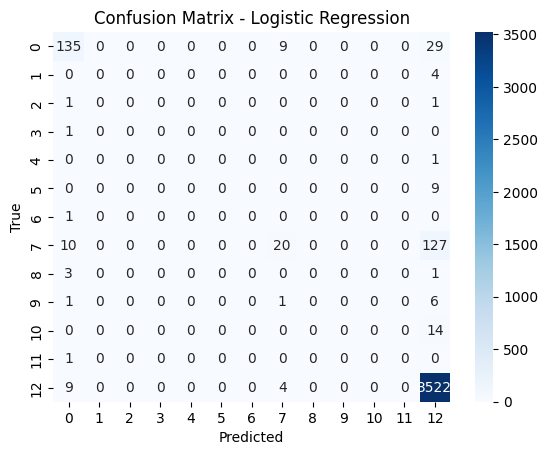

In [17]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the model on the training set
lr_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Step 7: Display results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:}")
print(f"F1 Score (Weighted): {f1_lr:}")
print(f"Precision (Weighted): {precision_lr:}")
print(f"Recall (Weighted): {recall_lr:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lr.mean():}")

# Step 8: Confusion Matrix for Logistic Regression model
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/linear_model/_logisti

Best Logistic Regression Model Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9491048593350384
F1 Score (Weighted): 0.9321141913064293
Precision (Weighted): 0.9340919788867521
Recall (Weighted): 0.9491048593350384
Cross-validation Accuracy (5-fold): 0.9484706801249698

Confusion Matrix (Best Logistic Regression):
[[ 159    0    0    0    0    0    0    4    0    0    0    0   10]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    0    0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   8    0    0    0    0    0    0   22    0    0    0    0  127]
 [   2    0    0    0    0    0    0    0    1    0    0    0

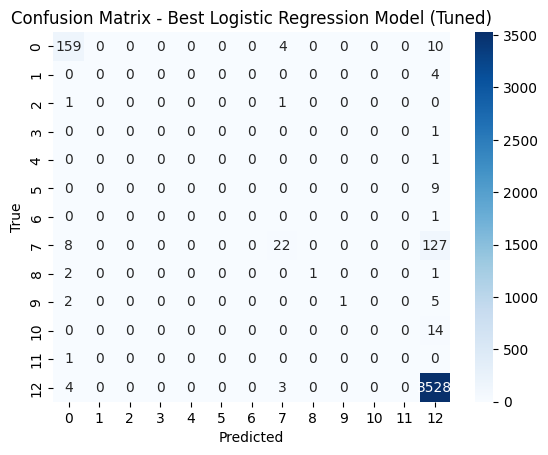

In [19]:
# Step 1: Define the parameter grid for Logistic Regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],               # Regularization strength
    'penalty': ['l2', 'l1'],               # Penalty type (L1 or L2)
    'solver': ['liblinear', 'saga']        # Solvers for optimization
}

# Step 2: Perform GridSearchCV for hyperparameter tuning
grid_search_lr = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_lr.fit(X_train, y_train)

# Step 3: Get the best parameters from GridSearchCV
best_params_lr = grid_search_lr.best_params_

# Step 4: Get the best Logistic Regression model
best_lr_model = grid_search_lr.best_estimator_

# Step 5: Make predictions with the best model
y_pred_best_lr = best_lr_model.predict(X_test)

# Step 6: Evaluate the best model's performance
accuracy_best_lr = accuracy_score(y_test, y_pred_best_lr)
f1_best_lr = f1_score(y_test, y_pred_best_lr, average='weighted')
precision_best_lr = precision_score(y_test, y_pred_best_lr, average='weighted')
recall_best_lr = recall_score(y_test, y_pred_best_lr, average='weighted')

# Step 7: Cross-validation score for the best model
cv_score_best_lr = cross_val_score(best_lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 8: Confusion Matrix for the best model
conf_matrix_best_lr = confusion_matrix(y_test, y_pred_best_lr)

# Step 9: Display Results
print("Best Logistic Regression Model Parameters:", best_params_lr)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_lr:}")
print(f"F1 Score (Weighted): {f1_best_lr:}")
print(f"Precision (Weighted): {precision_best_lr:}")
print(f"Recall (Weighted): {recall_best_lr:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_best_lr.mean():}")

# Step 10: Confusion Matrix for the best Logistic Regression model
print("\nConfusion Matrix (Best Logistic Regression):")
print(conf_matrix_best_lr)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_best_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Logistic Regression Model (Tuned)')
plt.show()

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Decision Tree Model Performance:
Accuracy: 0.9820971867007673
F1 Score (Weighted): 0.9817990013175704
Precision (Weighted): 0.9825145847534764
Recall (Weighted): 0.9820971867007673
Cross-validation Accuracy (5-fold): 0.9777432107666426

Confusion Matrix (Decision Tree):
[[ 171    0    0    0    0    0    0    0    0    0    0    2    0]
 [   0    0    0    0    0    0    0    0    0    0    1    0    3]
 [   1    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    7    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    2    0    0    0    0    0  139    2    0    1    0   13]
 [   0    0    0    0    0    0    0    0    3    0    0    0    1]
 [   0    0    0    0    0    0    0    0    2    3    0    1    2]
 [   0    0    0    0    0    0    0    0    0   

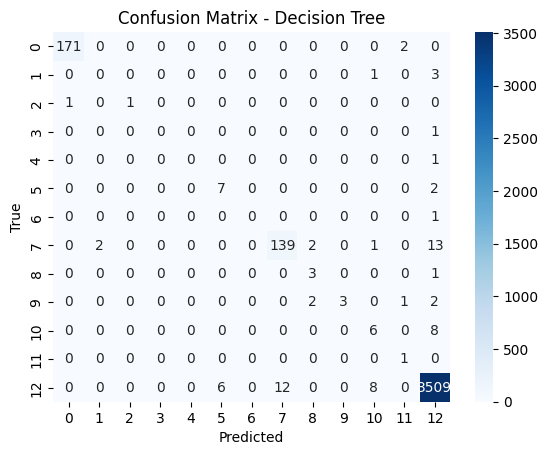

In [21]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the training set
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Step 7: Display results
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:}")
print(f"F1 Score (Weighted): {f1_dt:}")
print(f"Precision (Weighted): {precision_dt:}")
print(f"Recall (Weighted): {recall_dt:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_dt.mean():}")

# Step 8: Confusion Matrix for Decision Tree model
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Decision Tree Model Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}

Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9872122762148338
F1 Score (Weighted): 0.9863202706218063
Precision (Weighted): 0.9858331495519005
Recall (Weighted): 0.9872122762148338
Cross-validation Accuracy (5-fold): 0.9877204397981256

Confusion Matrix (Best Decision Tree):
[[ 173    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    2    0    0    0    0    0    0    0    0    1    0    1]
 [   0    0    2    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    7    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0  146    5    1    0    0    5]
 [   0    0    0    0    0    0   

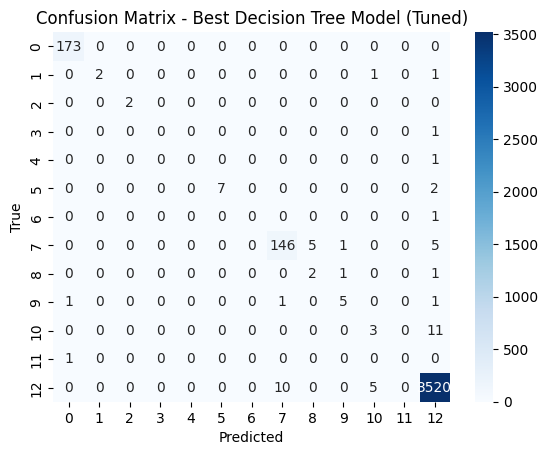

In [22]:
# Step 1: Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],            # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum samples required at each leaf node
    'criterion': ['gini', 'entropy'],     # Function to measure the quality of a split
}

# Step 2: Perform GridSearchCV for hyperparameter tuning
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_dt.fit(X_train, y_train)

# Step 3: Get the best parameters from GridSearchCV
best_params_dt = grid_search_dt.best_params_

# Step 4: Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

# Step 5: Make predictions with the best model
y_pred_best_dt = best_dt_model.predict(X_test)

# Step 6: Evaluate the best model's performance
accuracy_best_dt = accuracy_score(y_test, y_pred_best_dt)
f1_best_dt = f1_score(y_test, y_pred_best_dt, average='weighted')
precision_best_dt = precision_score(y_test, y_pred_best_dt, average='weighted')
recall_best_dt = recall_score(y_test, y_pred_best_dt, average='weighted')

# Step 7: Cross-validation score for the best model
cv_score_best_dt = cross_val_score(best_dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 8: Confusion Matrix for the best model
conf_matrix_best_dt = confusion_matrix(y_test, y_pred_best_dt)

# Step 9: Display Results
print("Best Decision Tree Model Parameters:", best_params_dt)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_dt:}")
print(f"F1 Score (Weighted): {f1_best_dt:}")
print(f"Precision (Weighted): {precision_best_dt:}")
print(f"Recall (Weighted): {recall_best_dt:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_best_dt.mean():}")

# Step 10: Confusion Matrix for the best Decision Tree model
print("\nConfusion Matrix (Best Decision Tree):")
print(conf_matrix_best_dt)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_best_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Decision Tree Model (Tuned)')
plt.show()

In [3]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 48.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Voting Classifier Model Performance:
Accuracy: 0.9537084398976982
F1 Score (Weighted): 0.9369934753796374
Precision (Weighted): 0.9442602768174669
Recall (Weighted): 0.9537084398976982
Cross-validation Accuracy (5-fold): 0.9527463350156212

Confusion Matrix (Voting Classifier):
[[ 166    0    0    0    0    0    0    0    0    0    0    0    7]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   3    0    0    0    0    0    0   28    0    0    0    0  126]
 [   3    0    0    0    0    0    0    0    0    0    0    0    1]
 [   3    0    0    0    0    0    0    0    0    0    0    0    5]
 [   0    0    0    0    0    0    0    0

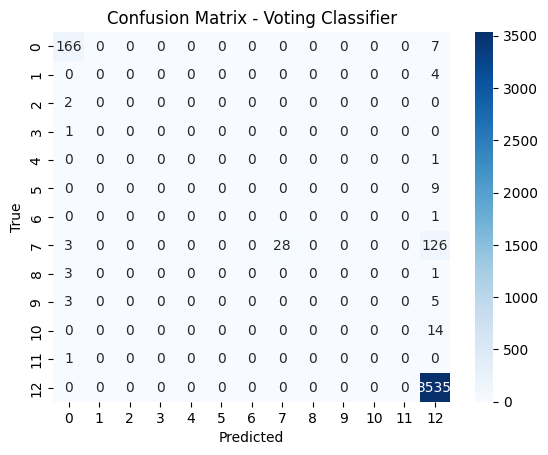

In [3]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize individual base models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Create a Voting Classifier with the base models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_model),
    ('svm', svm_model),
    ('rf', rf_model)
], voting='hard')  # 'hard' voting means the final prediction is the class with the majority vote

# Step 3: Train the Voting Classifier on the training set
voting_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')

# Step 6: Cross-validation score (5-fold cross-validation)
cv_score_voting = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Confusion Matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Step 8: Display results
print("Voting Classifier Model Performance:")
print(f"Accuracy: {accuracy_voting:}")
print(f"F1 Score (Weighted): {f1_voting:}")
print(f"Precision (Weighted): {precision_voting:}")
print(f"Recall (Weighted): {recall_voting:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_voting.mean():}")

# Step 9: Confusion Matrix for Voting Classifier model
print("\nConfusion Matrix (Voting Classifier):")
print(conf_matrix_voting)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Voting Classifier Model Parameters: {'log_reg__C': 0.01, 'rf__n_estimators': 50, 'svm__C': 10}

Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9595907928388747
F1 Score (Weighted): 0.9465930377061448
Precision (Weighted): 0.9527753372049959
Recall (Weighted): 0.9595907928388747
Cross-validation Accuracy (5-fold): 0.9573512376832491

Confusion Matrix (Best Voting Classifier):
[[ 171    0    0    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   2    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0   42    1    0    0    0  114]
 [   0    0    0    0    0    0    0    0    3    0    0

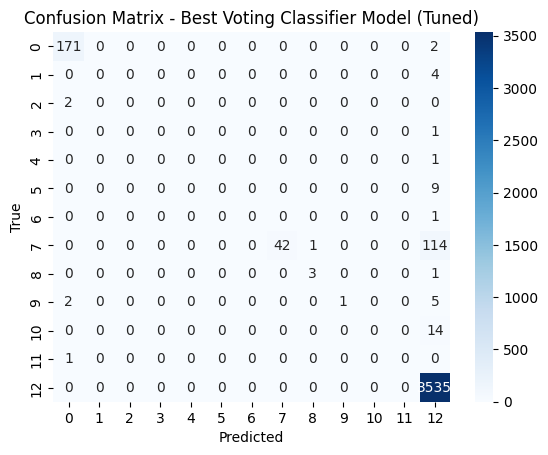

In [5]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define parameter grid for the base models
param_grid_voting = {
    'log_reg__C': [0.01, 0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'rf__n_estimators': [50, 100, 200],
}

# Step 2: Perform GridSearchCV for hyperparameter tuning
grid_search_voting = GridSearchCV(estimator=voting_clf, param_grid=param_grid_voting, 
                                  cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_voting.fit(X_train, y_train)

# Step 3: Get the best parameters from GridSearchCV
best_params_voting = grid_search_voting.best_params_

# Step 4: Get the best Voting Classifier model
best_voting_model = grid_search_voting.best_estimator_

# Step 5: Make predictions with the best model
y_pred_best_voting = best_voting_model.predict(X_test)

# Step 6: Evaluate the best model's performance
accuracy_best_voting = accuracy_score(y_test, y_pred_best_voting)
f1_best_voting = f1_score(y_test, y_pred_best_voting, average='weighted')
precision_best_voting = precision_score(y_test, y_pred_best_voting, average='weighted')
recall_best_voting = recall_score(y_test, y_pred_best_voting, average='weighted')

# Step 7: Cross-validation score for the best model
cv_score_best_voting = cross_val_score(best_voting_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 8: Confusion Matrix for the best model
conf_matrix_best_voting = confusion_matrix(y_test, y_pred_best_voting)

# Step 9: Display Results
print("Best Voting Classifier Model Parameters:", best_params_voting)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_voting:}")
print(f"F1 Score (Weighted): {f1_best_voting:}")
print(f"Precision (Weighted): {precision_best_voting:}")
print(f"Recall (Weighted): {recall_best_voting:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_best_voting.mean():}")

# Step 10: Confusion Matrix for the best Voting Classifier model
print("\nConfusion Matrix (Best Voting Classifier):")
print(conf_matrix_best_voting)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_best_voting, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best Voting Classifier Model (Tuned)')
plt.show()

/usr/local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


MLP Classifier (Neural Network) Model Performance:
Accuracy: 0.9621483375959079
F1 Score (Weighted): 0.9570122570544395
Precision (Weighted): 0.9541584898668788
Recall (Weighted): 0.9621483375959079
Cross-validation Accuracy (5-fold): 0.9630522710886806

Confusion Matrix (MLP Classifier):
[[ 170    0    1    0    0    0    0    0    0    0    0    0    2]
 [   0    0    0    0    0    0    0    0    0    0    0    0    4]
 [   1    0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    4    0    0    0    0    0    0    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0   81    1    0    1    0   74]
 [   0    0    0    0    0    0    0    0    2    0    0    0    2]
 [   1    0    0    0    0    0    0    0    0    3    0    0    4]
 [   0    0    0    0    0    

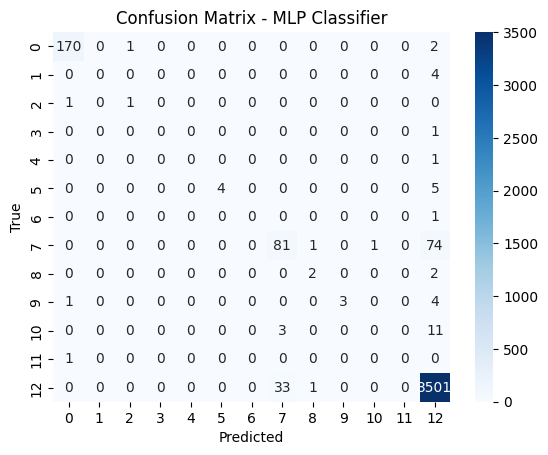

In [9]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the MLP Classifier (Neural Network)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Step 2: Train the model on the training set
mlp_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Step 7: Display results
print("MLP Classifier (Neural Network) Model Performance:")
print(f"Accuracy: {accuracy_mlp:}")
print(f"F1 Score (Weighted): {f1_mlp:}")
print(f"Precision (Weighted): {precision_mlp:}")
print(f"Recall (Weighted): {recall_mlp:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_mlp.mean():}")

# Step 8: Confusion Matrix for MLP model
print("\nConfusion Matrix (MLP Classifier):")
print(conf_matrix_mlp)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()

Fitting 5 folds for each of 54 candidates, totalling 270 fits


/usr/local/lib/python3.12/site-packages/sklearn/model_selection/_split.py:813: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:785: ConvergenceWarning: Stoch

Best MLP Model Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50, 50), 'learning_rate': 'constant', 'solver': 'adam'}

Best Model Performance after Hyperparameter Tuning:
Accuracy: 0.9736572890025575
F1 Score (Weighted): 0.9708869169479275
Precision (Weighted): 0.9687479621310525
Recall (Weighted): 0.9736572890025575
Cross-validation Accuracy (5-fold): 0.9713844628695025

Confusion Matrix (Best MLP):
[[ 171    0    1    0    0    0    0    0    0    0    0    0    1]
 [   0    2    0    0    0    0    0    0    0    0    0    0    2]
 [   1    1    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    4    0    0    0    0    0    0    5]
 [   0    0    0    0    0    0    0    0    0    0    0    0    1]
 [   0    0    0    0    0    0    0  116    1    0    0    0   40]
 [   0    0    0    0    0    0    0    0

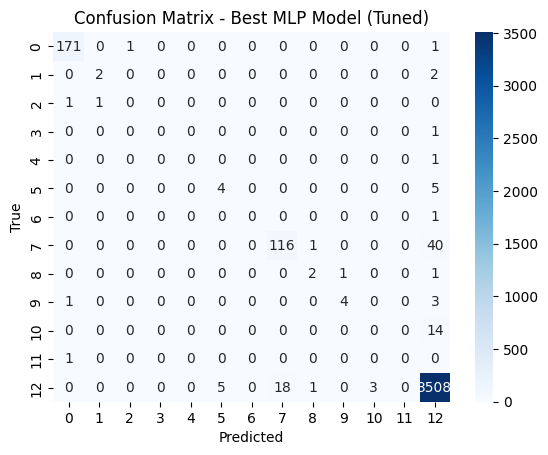

In [13]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the parameter grid for MLP (Neural Network)
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Number of neurons in each hidden layer
    'activation': ['relu', 'tanh', 'logistic'],      # Activation function
    'solver': ['adam', 'sgd'],                        # Optimization algorithm
    'learning_rate': ['constant', 'invscaling', 'adaptive'],  # Learning rate schedule
}

# Step 2: Perform GridSearchCV for hyperparameter tuning
grid_search_mlp = GridSearchCV(estimator=mlp_model, param_grid=param_grid_mlp, 
                               cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_mlp.fit(X_train, y_train)

# Step 3: Get the best parameters from GridSearchCV
best_params_mlp = grid_search_mlp.best_params_

# Step 4: Get the best MLP model
best_mlp_model = grid_search_mlp.best_estimator_

# Step 5: Make predictions with the best model
y_pred_best_mlp = best_mlp_model.predict(X_test)

# Step 6: Evaluate the best model's performance
accuracy_best_mlp = accuracy_score(y_test, y_pred_best_mlp)
f1_best_mlp = f1_score(y_test, y_pred_best_mlp, average='weighted')
precision_best_mlp = precision_score(y_test, y_pred_best_mlp, average='weighted')
recall_best_mlp = recall_score(y_test, y_pred_best_mlp, average='weighted')

# Step 7: Cross-validation score for the best model
cv_score_best_mlp = cross_val_score(best_mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 8: Confusion Matrix for the best model
conf_matrix_best_mlp = confusion_matrix(y_test, y_pred_best_mlp)

# Step 9: Display Results
print("Best MLP Model Parameters:", best_params_mlp)
print("\nBest Model Performance after Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_best_mlp:}")
print(f"F1 Score (Weighted): {f1_best_mlp:}")
print(f"Precision (Weighted): {precision_best_mlp:}")
print(f"Recall (Weighted): {recall_best_mlp:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_best_mlp.mean():}")

# Step 10: Confusion Matrix for the best MLP model
print("\nConfusion Matrix (Best MLP):")
print(conf_matrix_best_mlp)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_best_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Best MLP Model (Tuned)')
plt.show()

In [26]:
pip install imblearn


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
normalized_data_2 = pd.read_csv('/kaggle/input/all-datasets/normalized_data_after_random_oversampling.csv')

# Splitting the data into features (X) and target (y)
X = normalized_data_2.drop(columns=['Diagnosis'])
y = normalized_data_2 ['Diagnosis']

# Splitting the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Accuracy: 0.9997606301954128
F1 Score (Weighted): 0.999760538957557
Precision (Weighted): 0.9997610199103988
Recall (Weighted): 0.9997606301954128
Cross-validation Accuracy (5-fold): 0.9997948239682909

Confusion Matrix:
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3564    0    0]
 [   0    0    0    0    0    0

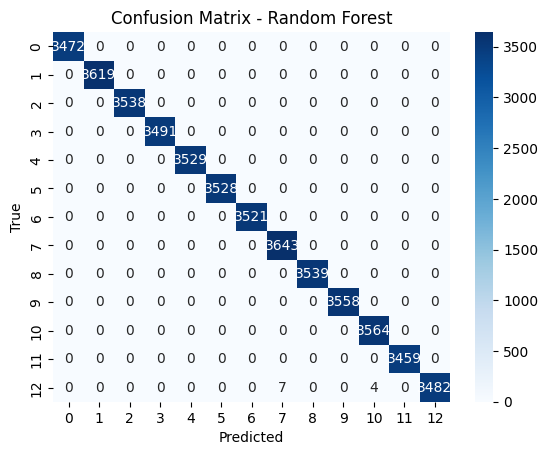

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Train the model on the training set
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Step 4: Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Step 5: Compute the train accuracy
train_accuracy = rf_model.score(X_train, y_train)

# Step 6: Cross-validation score (5-fold cross-validation)
cv_score = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 8: Display results
print("Accuracy:", accuracy)
print("F1 Score (Weighted):", f1)
print("Precision (Weighted):", precision)
print("Recall (Weighted):", recall)
print("Cross-validation Accuracy (5-fold):", cv_score.mean())
print("\nConfusion Matrix:")
print(conf_matrix)

# Step 9: Optionally, plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()

Accuracy (Gradient Boosting): 0.9988901945423685
F1 Score (Weighted): 0.99888796557032
Precision (Weighted): 0.9988975755627898
Recall (Weighted): 0.9988901945423685
Cross-validation Accuracy (5-fold): 0.9990207507577523

Confusion Matrix (Gradient Boosting):
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3564    

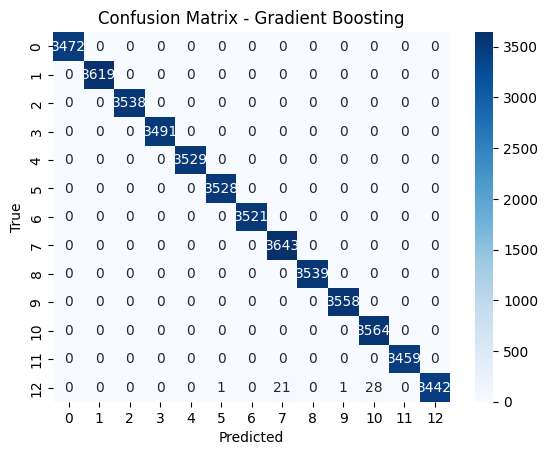

In [40]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gbc_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training set
gbc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc_model.predict(X_test)

# Evaluate the model performance
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
f1_gbc = f1_score(y_test, y_pred_gbc, average='weighted')
precision_gbc = precision_score(y_test, y_pred_gbc, average='weighted')
recall_gbc = recall_score(y_test, y_pred_gbc, average='weighted')

# Cross-validation score
cv_score_gbc = cross_val_score(gbc_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)

# Display results
print("Accuracy (Gradient Boosting):", accuracy_gbc)
print("F1 Score (Weighted):", f1_gbc)
print("Precision (Weighted):", precision_gbc)
print("Recall (Weighted):", recall_gbc)
print("Cross-validation Accuracy (5-fold):", cv_score_gbc.mean())
print("\nConfusion Matrix (Gradient Boosting):")
print(conf_matrix_gbc)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_gbc, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

SVM Model Performance:
Accuracy: 0.9659442050746399
F1 Score (Weighted): 0.9656998749512403
Precision (Weighted): 0.9658138270199754
Recall (Weighted): 0.9659442050746399
Cross-validation Accuracy (5-fold): 0.9611377943576592

Confusion Matrix (SVM):
[[3457    0    0    0    0    0    0    0    0    0    0    0   15]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   5    0    0    0   15    0    0 3074    5    0  275    0  269]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0  181    0    0 3255    0  128]
 

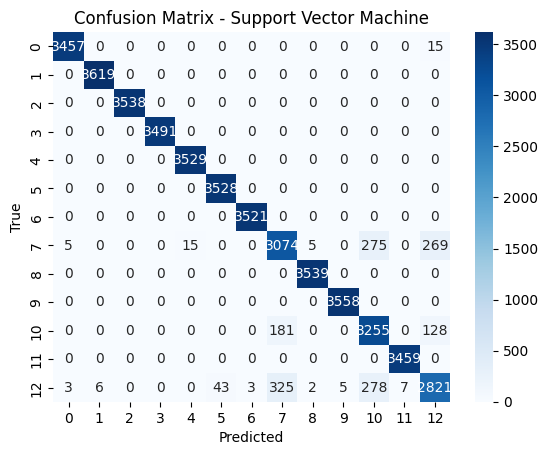

In [42]:
# Splitting the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

# Cross-validation score (5-fold cross-validation)
cv_score_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Step 5: Display Results
print("SVM Model Performance:")
print(f"Accuracy: {accuracy_svm:}")
print(f"F1 Score (Weighted): {f1_svm:}")
print(f"Precision (Weighted): {precision_svm:}")
print(f"Recall (Weighted): {recall_svm:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_svm.mean():}")

# Step 6: Display Confusion Matrix
print("\nConfusion Matrix (SVM):")
print(conf_matrix_svm)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

KNN Model Performance:
Accuracy: 0.9922748835792314
F1 Score (Weighted): 0.9921665885792064
Precision (Weighted): 0.9926564850045945
Recall (Weighted): 0.9922748835792314
Cross-validation Accuracy (5-fold): 0.9917649801818605

Confusion Matrix (KNN):
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0 3564    0    0]
 

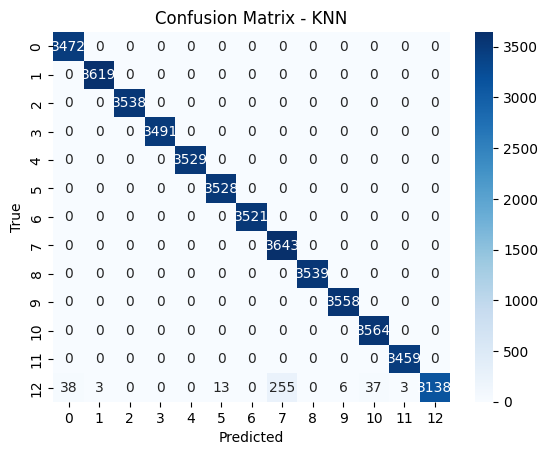

In [43]:
from sklearn.neighbors import KNeighborsClassifier

# Step 1: Initialize the K-Nearest Neighbors model
knn_model = KNeighborsClassifier()

# Step 2: Train the model on the training set
knn_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_knn = cross_val_score(knn_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

# Step 7: Display results
print("KNN Model Performance:")
print(f"Accuracy: {accuracy_knn:}")
print(f"F1 Score (Weighted): {f1_knn:}")
print(f"Precision (Weighted): {precision_knn:}")
print(f"Recall (Weighted): {recall_knn:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_knn.mean():}")

# Step 8: Confusion Matrix for the KNN model
print("\nConfusion Matrix (KNN):")
print(conf_matrix_knn)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - KNN')
plt.show()

Logistic Regression Model Performance:
Accuracy: 0.8141184662923794
F1 Score (Weighted): 0.8094464013652815
Precision (Weighted): 0.8085709413465924
Recall (Weighted): 0.8141184662923794
Cross-validation Accuracy (5-fold): 0.8127955234320355

Confusion Matrix (Logistic Regression):
[[2238   72  498    0    0    0   27  406   36  161    0    8   26]
 [ 266 2541    0    0    0    0    0    0    0  812    0    0    0]
 [   0    0 3016    0    0    0    0  522    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3381    0    0  147    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [ 205  155  160   13   37    7    0 1195   46   31 1268    8  518]
 [   0    0    0    0    0    0    0    0 3181  358    0    0    0]
 [   0  376    0    0    0    0    0    0  169 3013    0    0    0]
 [ 132  148   65    0    0   68    0 

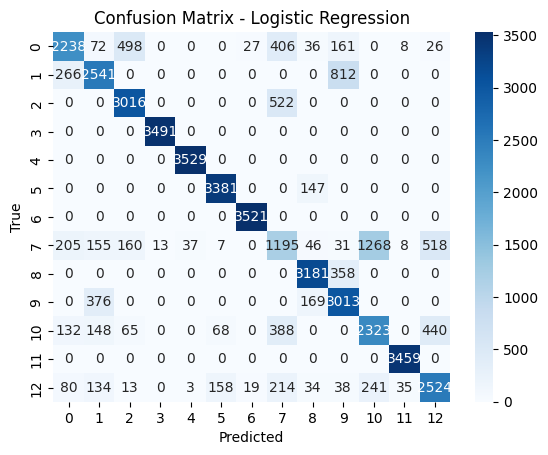

In [44]:
from sklearn.linear_model import LogisticRegression

# Step 1: Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Step 2: Train the model on the training set
lr_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)

# Step 7: Display results
print("Logistic Regression Model Performance:")
print(f"Accuracy: {accuracy_lr:}")
print(f"F1 Score (Weighted): {f1_lr:}")
print(f"Precision (Weighted): {precision_lr:}")
print(f"Recall (Weighted): {recall_lr:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lr.mean():}")

# Step 8: Confusion Matrix for Logistic Regression model
print("\nConfusion Matrix (Logistic Regression):")
print(conf_matrix_lr)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Decision Tree Model Performance:
Accuracy: 0.9989772381076729
F1 Score (Weighted): 0.998975288132274
Precision (Weighted): 0.998983270423978
Recall (Weighted): 0.9989772381076729
Cross-validation Accuracy (5-fold): 0.9991886220564232

Confusion Matrix (Decision Tree):
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3643    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0

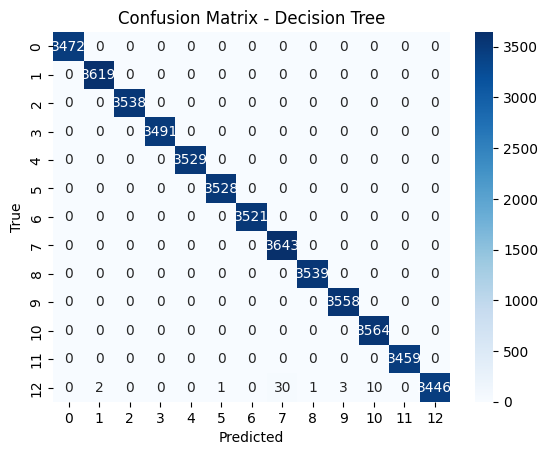

In [45]:
from sklearn.tree import DecisionTreeClassifier

# Step 1: Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Step 2: Train the model on the training set
dt_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_dt = cross_val_score(dt_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

# Step 7: Display results
print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:}")
print(f"F1 Score (Weighted): {f1_dt:}")
print(f"Precision (Weighted): {precision_dt:}")
print(f"Recall (Weighted): {recall_dt:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_dt.mean():}")

# Step 8: Confusion Matrix for Decision Tree model
print("\nConfusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

In [48]:
pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 55.3 MB/s eta 0:00:00

[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1436
[LightGBM] [Info] Number of data points in the train set: 107225, number of used features: 11
[LightGBM] [Info] Start training from score -2.557349
[LightGBM] [Info] Start training from score -2.575195
[LightGBM] [Info] Start training from score -2.565322
[LightGBM] [Info] Start training from score -2.559638
[LightGBM] [Info] Start training from score -2.564231
[LightGBM] [Info] Start training from score -2.564110
[LightGBM] [Info] Start training from score -2.563263
[LightGBM] [Info] Start training from score -2.578139
[LightGBM] [Info] Start training from score -2.565444
[LightGBM] [Info] Start training from score -2.567751
[LightGBM] [Info] Start training from score -2.568481
[LightGBM] [Info] Start training from score -2.555787
[LightGBM] [Info] Start training from score -2.559879
[LightGB

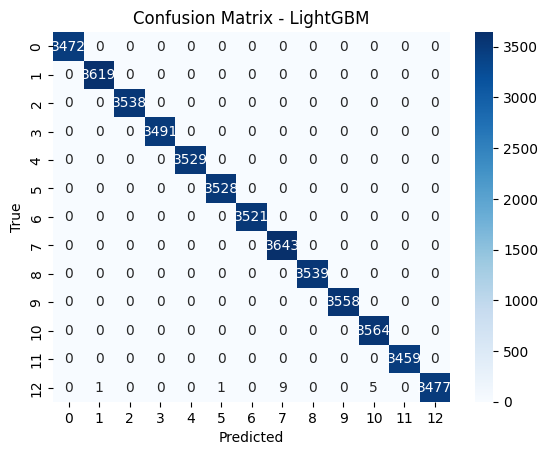

In [49]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)

# Step 2: Train the model on the training set
lgb_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_lgb = lgb_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')
precision_lgb = precision_score(y_test, y_pred_lgb, average='weighted')
recall_lgb = recall_score(y_test, y_pred_lgb, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_lgb = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

# Step 7: Display results
print("LightGBM Model Performance:")
print(f"Accuracy: {accuracy_lgb:}")
print(f"F1 Score (Weighted): {f1_lgb:}")
print(f"Precision (Weighted): {precision_lgb:}")
print(f"Recall (Weighted): {recall_lgb:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_lgb.mean():}")

# Step 8: Confusion Matrix for LightGBM model
print("\nConfusion Matrix (LightGBM):")
print(conf_matrix_lgb)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - LightGBM')
plt.show()

Voting Classifier Model Performance:
Accuracy: 0.9751055403229316
F1 Score (Weighted): 0.9747377869077201
Precision (Weighted): 0.9748971138970607
Recall (Weighted): 0.9751055403229316
Cross-validation Accuracy (5-fold): 0.9709769176964327

Confusion Matrix (Voting Classifier):
[[3463    0    0    0    0    0    0    0    0    0    0    0    9]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [  38   23    0    0   15    0    0 3150    5    0  211    0  201]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0    0    0

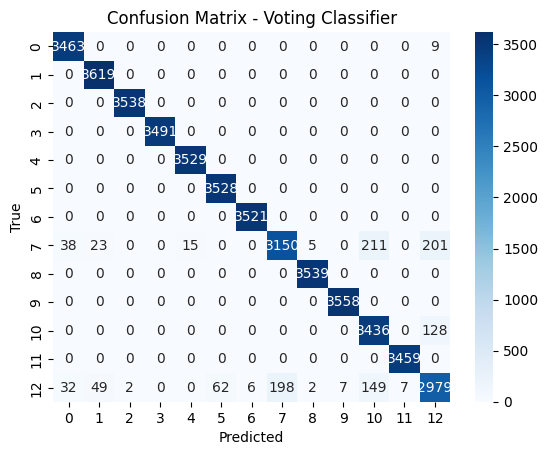

In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize individual base models
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
svm_model = SVC(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Create a Voting Classifier with the base models
voting_clf = VotingClassifier(estimators=[
    ('log_reg', log_reg_model),
    ('svm', svm_model),
    ('rf', rf_model)
], voting='hard')  # 'hard' voting means the final prediction is the class with the majority vote

# Step 3: Train the Voting Classifier on the training set
voting_clf.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test)

# Step 5: Evaluate the model's performance
accuracy_voting = accuracy_score(y_test, y_pred_voting)
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')

# Step 6: Cross-validation score (5-fold cross-validation)
cv_score_voting = cross_val_score(voting_clf, X_train, y_train, cv=5, scoring='accuracy')

# Step 7: Confusion Matrix
conf_matrix_voting = confusion_matrix(y_test, y_pred_voting)

# Step 8: Display results
print("Voting Classifier Model Performance:")
print(f"Accuracy: {accuracy_voting:}")
print(f"F1 Score (Weighted): {f1_voting:}")
print(f"Precision (Weighted): {precision_voting:}")
print(f"Recall (Weighted): {recall_voting:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_voting.mean():}")

# Step 9: Confusion Matrix for Voting Classifier model
print("\nConfusion Matrix (Voting Classifier):")
print(conf_matrix_voting)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Voting Classifier')
plt.show()

MLP Classifier (Neural Network) Model Performance:
Accuracy: 0.9934282108195152
F1 Score (Weighted): 0.9933636577240696
Precision (Weighted): 0.9934934652317853
Recall (Weighted): 0.9934282108195152
Cross-validation Accuracy (5-fold): 0.990002331545815

Confusion Matrix (MLP Classifier):
[[3472    0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 3619    0    0    0    0    0    0    0    0    0    0    0]
 [   0    0 3538    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 3491    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0 3529    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0 3528    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0 3521    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0 3599    0    0    0    0   44]
 [   0    0    0    0    0    0    0    0 3539    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0 3558    0    0    0]
 [   0    0    0    0    0    0

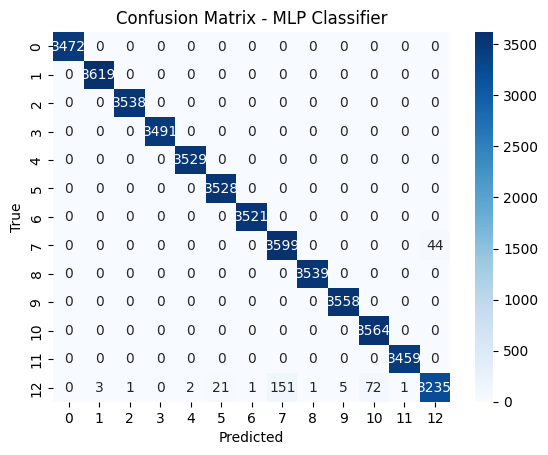

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Step 1: Initialize the MLP Classifier (Neural Network)
mlp_model = MLPClassifier(random_state=42, max_iter=1000)

# Step 2: Train the model on the training set
mlp_model.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred_mlp = mlp_model.predict(X_test)

# Step 4: Evaluate the model's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
f1_mlp = f1_score(y_test, y_pred_mlp, average='weighted')
precision_mlp = precision_score(y_test, y_pred_mlp, average='weighted')
recall_mlp = recall_score(y_test, y_pred_mlp, average='weighted')

# Step 5: Cross-validation score (5-fold cross-validation)
cv_score_mlp = cross_val_score(mlp_model, X_train, y_train, cv=5, scoring='accuracy')

# Step 6: Confusion Matrix
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)

# Step 7: Display results
print("MLP Classifier (Neural Network) Model Performance:")
print(f"Accuracy: {accuracy_mlp:}")
print(f"F1 Score (Weighted): {f1_mlp:}")
print(f"Precision (Weighted): {precision_mlp:}")
print(f"Recall (Weighted): {recall_mlp:}")
print(f"Cross-validation Accuracy (5-fold): {cv_score_mlp.mean():}")

# Step 8: Confusion Matrix for MLP model
print("\nConfusion Matrix (MLP Classifier):")
print(conf_matrix_mlp)

# Visualize the confusion matrix
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - MLP Classifier')
plt.show()